# Restaurant Revenue Prediction
## Run by Hsien-Feng(Sam) Hou

## Agenda
#### 1. Pre-processing data
#### 2. Insights and data basis
#### 3. Regression Models
#### 4. Get Test data and Run

## Pre-processing Data

In [1]:
# Import all useful package
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [2]:
# Read train data
train_data = pd.read_csv('/Users/samhou/Desktop/Python/restaurant-revenue-prediction/train.csv')
train_data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [3]:
# Get the shape of dataset
train_data.shape

(137, 43)

In [4]:
# Clean Data to get Open Days till 01/01,2015
train_data['Open Date']=pd.to_datetime(train_data['Open Date'])
set_date = dt(2015,1,1)
day_df = []

for date in train_data['Open Date']:
    date = set_date - date
    day_df.append(date)
    
train_data['Open Days'] = pd.Series(day_df)
train_data['Open Days'] = train_data['Open Days'].astype('timedelta64[D]').astype(int)
train_data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Open Days
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,5,3,4,5,5,4,3,4,5653753.0,5647
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,0,6923131.0,2513
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,0,2055379.0,663
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,25,12,10,6,18,12,12,6,2675511.0,1064
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,5,1,3,2,3,4,3,3,4316715.0,2063


##  Insights and Data Basis

In [5]:
# Count of Cities
g = train_data.groupby(['City Group','City']).agg({'Type':'count'})
g.sort_values('Type',ascending = False)

# Big Cities:78, Other:59
# Istanbul and Ankara have most restaurants

Type
City Group City                
Big Cities İstanbul          50
           Ankara            19
           İzmir              9
Other      Samsun             5
           Bursa              5
           Antalya            4
           Sakarya            4
           Tekirdağ           3
           Diyarbakır         3
           Eskişehir          3
           Adana              3
           Kayseri            3
           Trabzon            2
           Aydın              2
           Konya              2
           Muğla              2
           Tokat              1
           Uşak               1
           Osmaniye           1
           Kırklareli         1
           Kütahya            1
           Isparta            1
           Kocaeli            1
           Kastamonu          1
           Karabük            1
           Gaziantep          1
           Elazığ             1
           Edirne             1
           Denizli            1
           Bolu               1
           Balıkesir          1
           Amasya             1
           Afyonkarahisar     1
           Şanlıurfa          1

In [6]:
# Revenue in ranges
train_data['revenue'] = pd.to_numeric(train_data['revenue'], errors='coerce')
rev_cou = train_data.groupby(pd.cut(train_data['revenue'], np.arange(1000000,11000000,1000000))).agg({'revenue':'count'})
rev_cou
# train_data['revenue'].mean()
# Mean of the revenue is 4,453,532.61

,revenue
revenue,
"(1000000, 2000000]",10
"(2000000, 3000000]",25
"(3000000, 4000000]",36
"(4000000, 5000000]",29
"(5000000, 6000000]",15
"(6000000, 7000000]",8
"(7000000, 8000000]",5
"(8000000, 9000000]",4
"(9000000, 10000000]",2


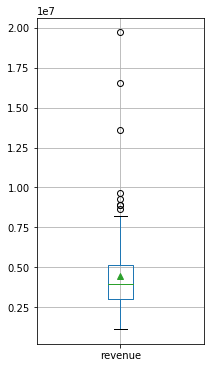

In [7]:
# Revenue boxplot
train_data.boxplot(column = 'revenue', return_type = 'axes', figsize=(3,6), showmeans=True)

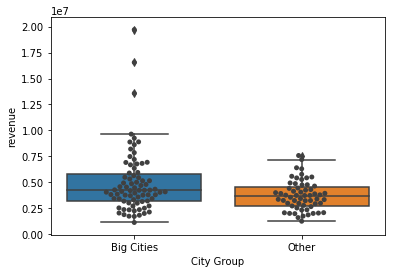

In [8]:
# Revenue boxplot for Big Cities vs Other
sns.boxplot(x='City Group', y='revenue', data=train_data)
sns.swarmplot(x='City Group', y='revenue', data=train_data, color=".25")

## Regression Models

In [9]:
# Clean data
# Make data into numeric and sperate into X,y dataframe
y = train_data['revenue']
train_data = train_data.join(pd.get_dummies(train_data['City Group'], prefix="CG"))
X = train_data.drop(['Id','Open Date','City','City Group','Type','revenue'],axis=1)
X.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P31,P32,P33,P34,P35,P36,P37,Open Days,CG_Big Cities,CG_Other
0,4,5.0,4.0,4.0,2,2,5,4,5,5,...,3,4,5,5,4,3,4,5647,1,0
1,4,5.0,4.0,4.0,1,2,5,5,5,5,...,0,0,0,0,0,0,0,2513,1,0
2,2,4.0,2.0,5.0,2,3,5,5,5,5,...,0,0,0,0,0,0,0,663,0,1
3,6,4.5,6.0,6.0,4,4,10,8,10,10,...,12,10,6,18,12,12,6,1064,0,1
4,3,4.0,3.0,4.0,2,2,5,5,5,5,...,1,3,2,3,4,3,3,2063,0,1


In [10]:
y.head()

0    5653753.0
1    6923131.0
2    2055379.0
3    2675511.0
4    4316715.0
Name: revenue, dtype: float64

In [11]:
# Use MultipleLinearRegression as regression model
from sklearn import preprocessing, cross_validation
from sklearn.linear_model import LinearRegression

#X_train, X_test0, y_train, y_test0 = cross_validation.train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X, y)

accuracy = clf.score(X, y)
print(accuracy)

0.339675981691729


/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
X.corrwith(train_data['revenue'])

P1               0.070217
P2               0.191518
P3              -0.024613
P4               0.035685
P5              -0.028191
P6               0.139094
P7               0.051165
P8              -0.084215
P9              -0.050352
P10             -0.073220
P11              0.084247
P12             -0.062193
P13             -0.105085
P14              0.006441
P15              0.000742
P16             -0.037997
P17              0.067137
P18             -0.034537
P19              0.027984
P20              0.014147
P21              0.097411
P22              0.083562
P23              0.045507
P24              0.014222
P25              0.036365
P26             -0.007650
P27             -0.013680
P28              0.155534
P29             -0.114846
P30             -0.066203
P31             -0.040418
P32             -0.065857
P33             -0.032426
P34             -0.072343
P35             -0.050156
P36             -0.050534
P37             -0.019051
Open Days        0.325821
CG_Big Citie

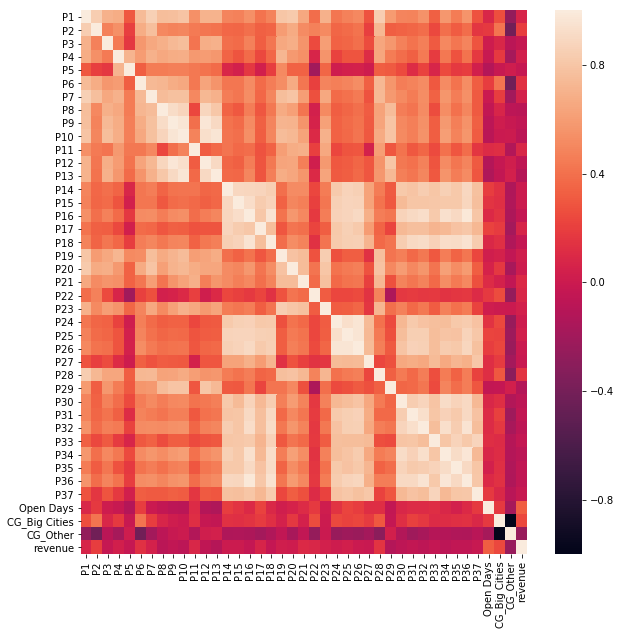

In [13]:
# Mapping the relationship among all variables
X_heat = train_data.drop(['Id','Open Date','City','City Group','Type','revenue'],axis=1)
X_heat['revenue'] = train_data['revenue']
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(X_heat.corr())

In [14]:
# Eliminate not related data and do again
X_1 = X.drop(['P14','P15','P26'],axis=1)
y = y

clf1 = LinearRegression()
clf1.fit(X_1, y)

accuracy = clf1.score(X_1, y)
print(accuracy)

0.3002305318419458


In [15]:
# Use SVR as regression model
from sklearn.svm import SVR

svr = SVR()
svr.fit(X, y)

accuracy = svr.score(X, y)
print(accuracy)

-0.04006153761011344


In [16]:
# Use RandomForestRegressor as regression model
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=150)
rfr.fit(X, y)

accuracy = rfr.score(X, y)
print(accuracy)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.8687274527740441


## Get Test Data and Run

In [17]:
# Get test data and have pre-processing
test_data = pd.read_csv('/Users/samhou/Desktop/Python/restaurant-revenue-prediction/test.csv')
test_data['Open Date']=pd.to_datetime(test_data['Open Date'])
day_df = []

for date in test_data['Open Date']:
    date = set_date - date
    day_df.append(date)
    
test_data['Open Days'] = pd.Series(day_df)
test_data['Open Days'] = test_data['Open Days'].astype('timedelta64[D]').astype(int)


test_data = test_data.join(pd.get_dummies(train_data['City Group'], prefix="CG"))
X_test = test_data.drop(['Id','Open Date','City','City Group','Type'],axis=1)
X_test.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P31,P32,P33,P34,P35,P36,P37,Open Days,CG_Big Cities,CG_Other
0,1,4.0,4.0,4.0,1,2,5,4,5,5,...,0,0,0,0,0,0,0,1440,1.0,0.0
1,3,4.0,4.0,4.0,2,2,5,3,4,4,...,0,0,0,0,0,0,0,1385,1.0,0.0
2,3,4.0,4.0,4.0,2,2,5,4,4,5,...,0,0,0,0,0,0,0,428,0.0,1.0
3,2,4.0,4.0,4.0,2,3,5,4,5,4,...,4,0,0,0,0,0,0,605,0.0,1.0
4,2,4.0,4.0,4.0,1,2,5,4,5,4,...,0,0,0,0,0,0,0,519,0.0,1.0


In [18]:
# Prediction of test data with RandomForestRegression model
X_test.fillna(0, inplace=True)
y_test = rfr.predict(X_test)
y_test

array([4338337.22666667, 3664494.04      , 3525078.28666667, ...,
       3680538.93333333, 3624005.42666667, 5972842.11333333])